# Top 10 Hottest Peppers in the World

How hot are the world's hottest peppers? How do they compare to those commonly used in cooking?

The Scoville Heat Unit (SHU) measures the spiciness of chili peppers. Originally, this involved diluting a pepper's alcohol-based extract in water until a panel of tasters could no longer detect the heat. The needed dilution determined the SHU. For example, if a pepper extract needed to be diluted 1,000 times before the heat was undetectable, it would be rated at 1,000 SHU.

Today, more accurate chemical methods determine SHU, but results are still expressed in Scoville Units.

The file `worlds-hottest-peppers.csv` lists the heat levels of the top 10 hottest peppers.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'worlds-hottest-peppers.csv'.

# from google.colab import files
# uploaded = files.upload()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('worlds-hottest-peppers.csv')
df

,pepper,scoville_heat_unit
0,Pepper X,2693000
1,Carolina Reaper,2200000
2,Trinidad Moruga Scorpion,2009231
3,7 Pot Douglah,1853936
4,7 Pot Primo,1469000
5,Trinidad Scorpion,1463700
6,Naga Viper,1349000
7,Ghost Pepper,1041427
8,7 Pot Barrackpore,1000000
9,Red Savina Habanero,500000


### Project Ideas

- Create a horizontal bar plot displaying the Scoville units for each pepper.

- Follow the Pro Tips.

- Use color or a reference bar to help readers build intuition about the heat of these peppers.


#### Ideas for storytelling

- Compare the world's hottest peppers to common cooking varieties. For example, Jalapeños range from 2,500 to 8,000 Scoville units.

- Highlight the rapid development of hotter peppers; for instance, the Ghost Pepper held the record in 2007, but has since been surpassed.

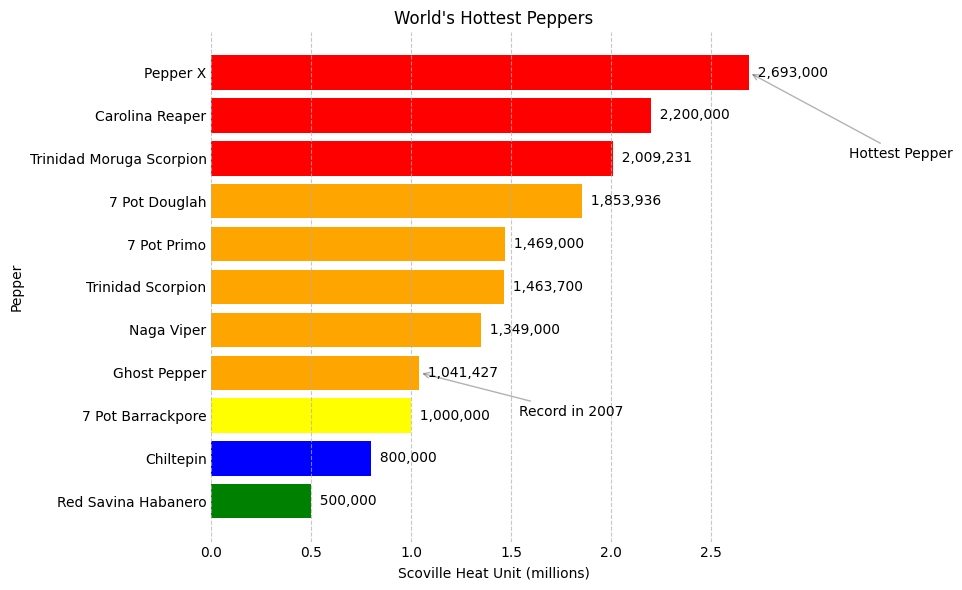

In [83]:
# YOUR CODE HERE (add additional cells as needed)

# Define the colors based on Scoville Heat Units 
df['color'] = df['scoville_heat_unit'].apply(
    lambda x: 'red' if x > 2000000 else 'orange' if x > 1000000 else 'yellow' if x > 500000 else 'green'
)

# Add a reference point for the hottest pepper
df.loc['ref']= ['Chiltepin', 800000, 'blue']

# Sort the DataFrame by Scoville Heat Unit in ascending order
df = df.sort_values(by='scoville_heat_unit', ascending=True)

# Define functions for label and title
def label_and_title(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Define functions for spines, ticks, and bar labels
def spines_and_ticks():
    ax = plt.gca()
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Define a function to label the bars with Scoville Heat Units
def label_bars():
    for _, row in df.iterrows():
        x = row['scoville_heat_unit']
        y = row['pepper']
        offset_spacing = "  "
        label = f"{offset_spacing}{x:,}"
        plt.text(x / 1_000_000, y, label, va='center', ha='left', fontsize=10)

def add_annotation():
    max = df['scoville_heat_unit'].max() / 1_000_000
    record_2007 = df[df['pepper'] == 'Ghost Pepper']['scoville_heat_unit'].values[0] / 1_000_000
    plt.annotate(
        'Hottest Pepper',
        xy=(max, df['pepper'].iloc[-1]),
        xytext=(df['scoville_heat_unit'].max() / 1_000_000 + 0.5, df['pepper'].iloc[-3]),
        arrowprops=dict(arrowstyle='->', alpha=0.3),
        fontsize=10,
        color='black'
    )

    # Annotation for the 2007 record and the hottest pepper to the storytelling
    plt.annotate(
        'Record in 2007',
        xy=(record_2007, 'Ghost Pepper'),
        xytext=(record_2007 + 0.5, df['pepper'].iloc[2]),
        arrowprops=dict(arrowstyle='->', alpha=0.3),
        fontsize=10,
        color='black'
    )

plt.figure(figsize=(10, 6))
plt.barh(df['pepper'], df['scoville_heat_unit'] / 1_000_000, color=df['color'])
label_and_title('Scoville Heat Unit (millions)', 'Pepper',  'World\'s Hottest Peppers')
spines_and_ticks()
label_bars()
add_annotation()

plt.tight_layout()
plt.show()


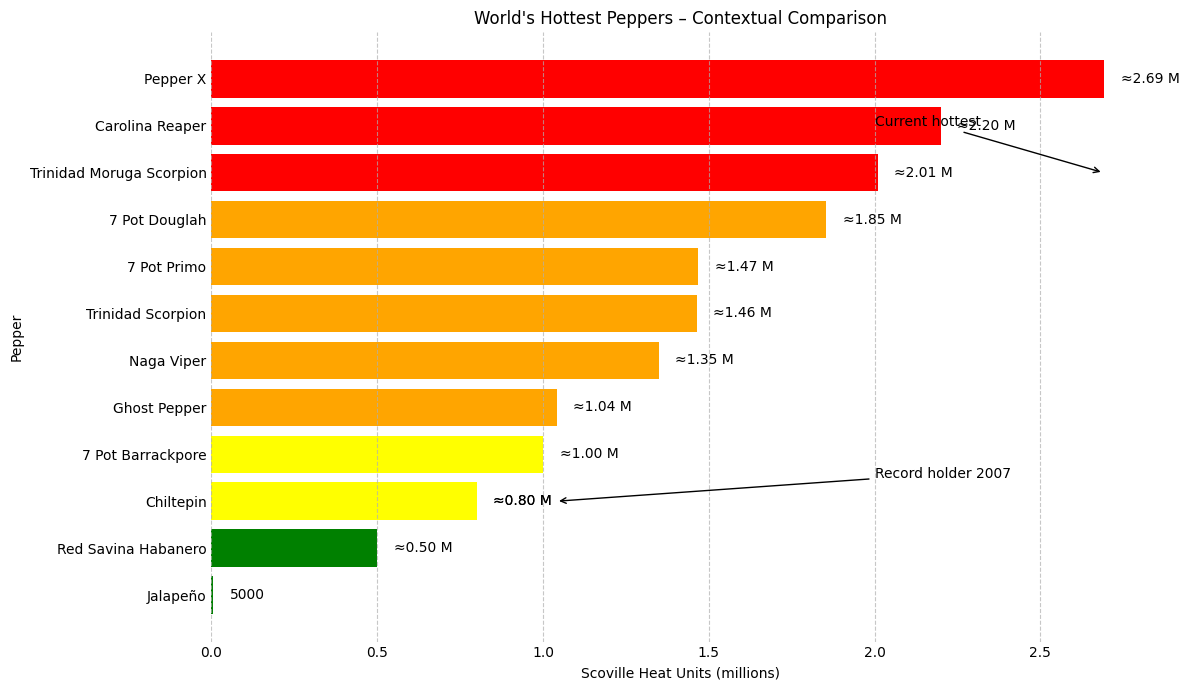

In [84]:
# Agregar referencias de pimientos comunes
ref_peppers = pd.DataFrame({
    'pepper': ['Chiltepin', 'Jalapeño'],
    'scoville_heat_unit': [800000, 5000]
})
df = pd.concat([df, ref_peppers], ignore_index=True)

# Colores según intensidad
def get_color(x):
    if x > 2000000:
        return 'red'
    elif x > 1000000:
        return 'orange'
    elif x > 500000:
        return 'yellow'
    else:
        return 'green'

df['color'] = df['scoville_heat_unit'].apply(get_color)

# Ordenar ascendente
df = df.sort_values(by='scoville_heat_unit', ascending=True)

# Crear gráfico
plt.figure(figsize=(12, 7))
bars = plt.barh(df['pepper'], df['scoville_heat_unit']/1_000_000, color=df['color'])

# Etiquetas dentro de las barras
for bar, val in zip(bars, df['scoville_heat_unit']):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f"≈{val/1_000_000:.2f} M" if val > 10000 else f"{val}", 
             va='center', ha='left', fontsize=10)

# Título y ejes
plt.xlabel('Scoville Heat Units (millions)')
plt.ylabel('Pepper')
plt.title("World's Hottest Peppers – Contextual Comparison")

# Anotaciones para storytelling
plt.annotate('Record holder 2007', xy=(1.04, 2), xytext=(2, 2.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate('Current hottest', xy=(2.69, 9), xytext=(2, 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Spines y grid
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', length=0)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()